**Importing Packages**

In [1]:
#importing required libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import string
import nltk
nltk.download('punkt')

import os
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Malayalam Dataset**

In [2]:
#reading the Malayalam dataset
train=pd.read_csv('/content/drive/MyDrive/offensive language/Malayalam dataset/Mal_Training_data.tsv',sep='\t', index_col=[0])
test=pd.read_csv('/content/drive/MyDrive/offensive language/Malayalam dataset/mal_test_data_with_labels.tsv',sep='\t', index_col=[0])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


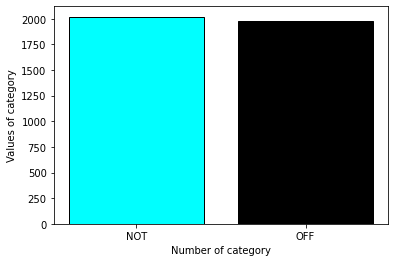

NOT    2047
OFF    1953
Name: Category, dtype: int64

In [4]:
# bar chart
value=[2020,1980]
category=['NOT','OFF']
plt.bar(category,value,color=["cyan","black"],edgecolor='black')
plt.xlabel('Number of category')
plt.ylabel('Values of category')
plt.show()

#Label counts
train['Category'].value_counts()

# **Removing punctuation**

In [5]:
#remove punctuation
import string
def remove_punctuations(txt):
    text_nopunc="".join([c for c in txt if c not in string.punctuation])
    return text_nopunc

train['Text']=train['Text'].apply(lambda x: remove_punctuations(x))
train

,Text,Category
MA_YT001,Thaankal enthaan cheyyarullath😛,NOT
MA_YT002,Ee theetam WCC feminichigalude news aarkk vena...,OFF
MA_YT003,fukru nem tiktok oolakale vilich charcha nadat...,OFF
MA_YT004,Aashiq abu produce cheytharunnel ee problems u...,NOT
MA_YT005,Pennungal oru team aayal ath moonjum ennu epoo...,OFF
...,...,...
MA_YT3996,Eee parasayam thanne thettanu Ella achanmaraya...,NOT
MA_YT3997,Ente bagathum thetundh ee vazhikke veraan paad...,NOT
MA_YT3998,Kuttiye njan kettikolaam swarnam onnum venda e...,NOT
MA_YT3999,Chumma veettil irunna chakkiye trollanmaarkku ...,NOT


# **Spliting to Dev Dataset**

In [6]:
#splitting dataset
X_train, X_dev, y_train, y_dev = train_test_split(train['Text'], train['Category'], test_size=0.30, random_state=42)

X_test= test['Text']
y_test= test['Category']

# **Encoding**

In [7]:
#Encoding Labels

Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.transform(y_test)
y_dev = Encoder.transform(y_dev)

In [8]:
#tfidf
Tfidf_vect = TfidfVectorizer(max_features=2000)
X_train = Tfidf_vect.fit_transform(X_train).toarray()
X_dev = Tfidf_vect.transform(X_dev).toarray()
X_test = Tfidf_vect.transform(X_test).toarray()

In [9]:
print(Tfidf_vect.vocabulary_)

{'kodathy': 891, 'avane': 179, 'oru': 1315, 'pullum': 1556, 'cheyyan': 303, 'onnu': 1276, 'poda': 1463, 'valiya': 1871, 'parayunnathu': 1399, 'swantham': 1706, 'sthreekale': 1685, 'peedipurl': 1430, 'patte': 1409, 'ayi': 206, 'poyi': 1523, 'kundi': 964, 'painting': 1348, 'alla': 85, 'rehana': 1592, 'kure': 980, 'ayittu': 210, 'jesla': 754, 'avalde': 170, 'theetam': 1787, 'cheythath': 291, 'thett': 1793, 'thettu': 1795, 'thalayanu': 1727, 'ðÿ': 1994, 'comment': 355, 'polum': 1487, 'illa': 632, 'support': 1703, 'cheyth': 287, 'appo': 129, 'ellam': 443, 'alle': 91, 'enthanennu': 485, 'nammal': 1160, 'innathe': 662, 'enu': 494, 'parayathe': 1387, 'nirthi': 1216, 'podi': 1467, 'ipo': 669, 'kanicha': 828, 'aa': 4, 'mon': 1099, 'kurach': 974, 'koodi': 930, 'sex': 1639, 'video': 1935, 'ini': 658, 'idum': 620, 'user': 1859, 'raktha': 1578, 'pakshe': 1352, 'njan': 1218, 'body': 232, 'minimum': 1087, 'vivaram': 1961, 'poolum': 1495, 'illatha': 638, 'joy': 767, 'ningade': 1198, 'pani': 1361, 'nokk

# **Naive Bayes**

In [10]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
# predict the dev dataset
pred_NB = Naive.predict(X_dev)

print(confusion_matrix(y_dev,pred_NB)) 
print(classification_report(y_dev,pred_NB))

[[469 140]
 [251 340]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       609
           1       0.71      0.58      0.63       591

    accuracy                           0.67      1200
   macro avg       0.68      0.67      0.67      1200
weighted avg       0.68      0.67      0.67      1200



In [12]:
# predict the test data
pred_NB_test = Naive.predict(X_test)

print(confusion_matrix(y_test,pred_NB_test)) 
print(classification_report(y_test,pred_NB_test))

[[365 108]
 [175 303]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       473
           1       0.74      0.63      0.68       478

    accuracy                           0.70       951
   macro avg       0.71      0.70      0.70       951
weighted avg       0.71      0.70      0.70       951



#**Support Vector Machine**

In [13]:
# fit the training dataset on the SVM classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
# predict the dev dataset
pred_SVM = SVM.predict(X_dev)

print(confusion_matrix(y_dev,pred_SVM)) 
print(classification_report(y_dev,pred_SVM))

[[456 153]
 [256 335]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       609
           1       0.69      0.57      0.62       591

    accuracy                           0.66      1200
   macro avg       0.66      0.66      0.66      1200
weighted avg       0.66      0.66      0.66      1200



In [15]:
# predict the test dataset
pred_SVM_test = SVM.predict(X_test)

print(confusion_matrix(y_test,pred_SVM_test)) 
print(classification_report(y_test,pred_SVM_test))

[[358 115]
 [197 281]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       473
           1       0.71      0.59      0.64       478

    accuracy                           0.67       951
   macro avg       0.68      0.67      0.67       951
weighted avg       0.68      0.67      0.67       951



# **Logistic Regression**

In [16]:
# fit the training dataset on the LR classifier
lr = LogisticRegression(C=2,class_weight = 'balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# predict the dev dataset
pred_LR = lr.predict(X_dev)

print(confusion_matrix(y_dev,pred_LR)) 
print(classification_report(y_dev,pred_LR))

[[434 175]
 [226 365]]
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       609
           1       0.68      0.62      0.65       591

    accuracy                           0.67      1200
   macro avg       0.67      0.67      0.66      1200
weighted avg       0.67      0.67      0.67      1200



In [18]:
# predict the test dataset
pred_LR_test = lr.predict(X_test)

print(confusion_matrix(y_test,pred_LR_test)) 
print(classification_report(y_test,pred_LR_test))

[[350 123]
 [175 303]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       473
           1       0.71      0.63      0.67       478

    accuracy                           0.69       951
   macro avg       0.69      0.69      0.69       951
weighted avg       0.69      0.69      0.69       951



# **Random** **Forest**

In [19]:
sc_X = StandardScaler(with_mean=False)
X_Train_RF = sc_X.fit_transform(X_train)
X_dev_RF = sc_X.transform(X_dev)
X_test_RF = sc_X.transform(X_test)

#Classifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train_RF,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
# Predicting the dev dataset 
pred_RF = classifier.predict(X_dev_RF)

print(confusion_matrix(y_dev,pred_RF)) 
print(classification_report(y_dev,pred_RF))

[[454 155]
 [282 309]]
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       609
           1       0.67      0.52      0.59       591

    accuracy                           0.64      1200
   macro avg       0.64      0.63      0.63      1200
weighted avg       0.64      0.64      0.63      1200



In [21]:
# Predicting the test dataset 
pred_RF_test = classifier.predict(X_test_RF)

print(confusion_matrix(y_test,pred_RF_test)) 
print(classification_report(y_test,pred_RF_test))

[[353 120]
 [200 278]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       473
           1       0.70      0.58      0.63       478

    accuracy                           0.66       951
   macro avg       0.67      0.66      0.66       951
weighted avg       0.67      0.66      0.66       951

